# Heart Disease Prediction based on symptoms

## Step 1: Define the Problem & Collect Data

Heart disease risk factors can be divided into two categories - those that can't be changed and those that can be modified. Factors that can't be changed include increasing age, male gender, and heredity. Thalassemia, a hereditary condition, is also a risk factor for heart disease. Factors that can be modified to reduce the risk of heart disease include smoking, high cholesterol, high blood pressure, physical inactivity, being overweight, and having diabetes. Other factors that may contribute to heart disease risk include stress, alcohol consumption, and poor diet/nutrition.

The Aim is to classication different heart diseases based on features, and features parameters like Sex, Age and Blood pressure etc. The input data for this project comes from a UCI open source [dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) that contains these features and their reference heart disease  from 0 (no presence) to 4. The dataset includes a total of 303 lines of data. The project will use this data to train a model that can accurately classify heart diseases level.

This database contains 14 attributes, The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

In [1]:
#loading libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


Here we loaded the Python libararies:

The code involves importing several Python libraries used in machine learning and data analysis
The first line imports "numpy" for array manipulation and math functions
The second line imports "pandas" for structured data management using DataFrames
The third line imports "StandardScaler" from "scikit-learn" for data standardization with mean 0 and standard deviation 1
The fourth line imports "train_test_split" from the same library for splitting dataset into training and testing sets for model development and evaluation.

In [6]:
# Loading kaggle data csv
dataset_url = "Dataset/processed.cleveland.data"
dataset = pd.read_csv(dataset_url,names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"])
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
print("Data rows and columns:", dataset.shape)

Data rows and columns: (303, 14)


#### Dataset Analysis:

The given code performs dataset analysis on a dataset that contains information about diseases and their corresponding features. Here are the key points

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1-4 = heart rate scale)

Calculating the number of samples of individual category of heart disease. 

In [9]:
disease_count = pd.DataFrame(dataset['target'].value_counts()).reset_index()
disease_count

,index,target
0,0,164
1,1,55
2,2,36
3,3,35
4,4,13


In above code:

Here we creates a new DataFrame called "disease_count" which counts the number of occurrences of each value in the "target" column of an existing DataFrame called "dataset". It uses the "value_counts()" method to count the occurrences of each unique value in the "target" column and the "reset_index()" method to reset the index of the new DataFrame. The result is a DataFrame called "disease_count" that shows how many times each unique value appears in the "target" column of the original DataFrame.

#### Removing non numerical values:

In [10]:
dataset.loc[dataset.ca=="?",'ca']=np.nan
dataset.loc[dataset.thal=="?",'thal']=np.nan

print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [11]:
dataset = dataset.astype(float)


In [12]:
# REPLACING WITH mean of the column
for x in dataset.columns:
    mean_of_column = dataset[x].mean()
    dataset[x].fillna(mean_of_column, inplace = True)

In [13]:
# no nan value found in current data
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# Calculating correlation between target of heart disease and other features.
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
ca          0.517390
thal        0.508799
oldpeak     0.504092
thalach     0.415040
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
Name: target, dtype: float64


In [15]:
print(f"Percentage of patience without heart problems: {round(np.count_nonzero(dataset['target'])/len(dataset['target']),2)}")
print(f"Percentage of patience with heart problems: {round(np.count_nonzero(dataset['target']==0)/len(dataset['target']),2)}")

Percentage of patience without heart problems: 0.46
Percentage of patience with heart problems: 0.54


#### Training dataset preparation:

- Load the dataset and split it into features and target.
- Normalize the numerical columns using StandardScaler.
- Spliting the dataset into training and testing.

In [16]:
# Split the data into features and target
X = dataset.drop(['target'], axis=1)
y = dataset['target']

# Normalize the numerical columns
scaler = StandardScaler()
X = scaler.fit_transform(X)

classes_n = len(np.unique(y))

## Step 2: Model evaluation method:

- **Train/Test Split:** The dataset split into training and testing sets, with the model being trained on the training set and evaluated on the testing set. This will be done using the train_test_split function from scikit-learn library.

- **Confusion Matrix:** A confusion matrix can be used to evaluate the performance of a classification model. It shows the number of true positives, true negatives, false positives, and false negatives, and can be used to calculate various performance metrics such as precision, recall, and F1-score.

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
from flaml import AutoML


automl_settings = {
    "time_budget": 60,  # Seconds
    "metric": 'accuracy', # Evaluation Metric
    "task": 'classification' # Supervised ML Task
}
autoML = AutoML()
autoML.fit(X_train, y_train, **automl_settings)

print(f"BEST MODEL:\n{autoML.model.estimator}")
print(f"ACCURACY SCORE: {autoML.score(X_test, y_test)}")

[flaml.automl.automl: 03-22 03:50:38] {2726} INFO - task = classification
[flaml.automl.automl: 03-22 03:50:38] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 03-22 03:50:38] {2731} INFO - Evaluation method: cv
[flaml.automl.automl: 03-22 03:50:38] {1316} INFO - class 4 augmented from 9 to 27
[flaml.automl.automl: 03-22 03:50:38] {2858} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.automl: 03-22 03:50:38] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 03-22 03:50:38] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-22 03:50:39] {3472} INFO - Estimated sufficient time budget=7101s. Estimated necessary time budget=164s.
[flaml.automl.automl: 03-22 03:50:39] {3519} INFO -  at 0.8s,	estimator lgbm's best error=0.4808,	best estimator lgbm's best error=0.4808
[flaml.automl.automl: 03-22 03:50:39] {3334} INFO - iteration 1, current learner lgbm
[flaml

c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:50:43] {3519} INFO -  at 4.8s,	estimator xgboost's best error=0.4154,	best estimator lgbm's best error=0.3615
[flaml.automl.automl: 03-22 03:50:43] {3334} INFO - iteration 8, current learner lgbm
[flaml.automl.automl: 03-22 03:50:44] {3519} INFO -  at 5.7s,	estimator lgbm's best error=0.3538,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:44] {3334} INFO - iteration 9, current learner xgboost


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:50:45] {3519} INFO -  at 6.7s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:45] {3334} INFO - iteration 10, current learner extra_tree
[flaml.automl.automl: 03-22 03:50:46] {3519} INFO -  at 7.7s,	estimator extra_tree's best error=0.4538,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:46] {3334} INFO - iteration 11, current learner xgboost


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:50:46] {3519} INFO -  at 8.3s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:46] {3334} INFO - iteration 12, current learner extra_tree
[flaml.automl.automl: 03-22 03:50:47] {3519} INFO -  at 8.8s,	estimator extra_tree's best error=0.4500,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:47] {3334} INFO - iteration 13, current learner rf
[flaml.automl.automl: 03-22 03:50:48] {3519} INFO -  at 9.6s,	estimator rf's best error=0.4500,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:48] {3334} INFO - iteration 14, current learner rf
[flaml.automl.automl: 03-22 03:50:48] {3519} INFO -  at 10.3s,	estimator rf's best error=0.4385,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:48] {3334} INFO - iteration 15, current learner xgboost


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:50:49] {3519} INFO -  at 10.8s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:49] {3334} INFO - iteration 16, current learner lgbm
[flaml.automl.automl: 03-22 03:50:50] {3519} INFO -  at 11.5s,	estimator lgbm's best error=0.3538,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:50] {3334} INFO - iteration 17, current learner xgboost


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-22 03:50:50] {3519} INFO -  at 12.1s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:50] {3334} INFO - iteration 18, current learner lgbm


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-22 03:50:51] {3519} INFO -  at 12.5s,	estimator lgbm's best error=0.3538,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:51] {3334} INFO - iteration 19, current learner rf
[flaml.automl.automl: 03-22 03:50:51] {3519} INFO -  at 13.4s,	estimator rf's best error=0.4385,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:51] {3334} INFO - iteration 20, current learner lgbm
[flaml.automl.automl: 03-22 03:50:52] {3519} INFO -  at 14.1s,	estimator lgbm's best error=0.3538,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:52] {3334} INFO - iteration 21, current learner lgbm
[flaml.automl.automl: 03-22 03:50:53] {3519} INFO -  at 14.6s,	estimator lgbm's best error=0.3538,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:53] {3334} INFO - iteration 22, current learner lgbm
[flaml.automl.automl: 03-22 03:50:53] {3519} INFO -  at 15.0s,	estimator lgbm's best error=0.3538,	b

c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-22 03:50:54] {3519} INFO -  at 16.2s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:54] {3334} INFO - iteration 25, current learner extra_tree


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-22 03:50:55] {3519} INFO -  at 16.9s,	estimator extra_tree's best error=0.4500,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:55] {3334} INFO - iteration 26, current learner lgbm
[flaml.automl.automl: 03-22 03:50:56] {3519} INFO -  at 17.8s,	estimator lgbm's best error=0.3538,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:56] {3334} INFO - iteration 27, current learner xgboost


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-22 03:50:57] {3519} INFO -  at 18.5s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:57] {3334} INFO - iteration 28, current learner xgboost


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:50:57] {3519} INFO -  at 19.0s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:57] {3334} INFO - iteration 29, current learner xgboost


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:50:58] {3519} INFO -  at 19.6s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3538
[flaml.automl.automl: 03-22 03:50:58] {3334} INFO - iteration 30, current learner lgbm
[flaml.automl.automl: 03-22 03:50:58] {3519} INFO -  at 20.1s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:50:58] {3334} INFO - iteration 31, current learner lgbm
[flaml.automl.automl: 03-22 03:50:59] {3519} INFO -  at 20.6s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:50:59] {3334} INFO - iteration 32, current learner lgbm
[flaml.automl.automl: 03-22 03:50:59] {3519} INFO -  at 21.2s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:50:59] {3334} INFO - iteration 33, current learner xgboost


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:51:03] {3519} INFO -  at 24.7s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:03] {3334} INFO - iteration 34, current learner lgbm
[flaml.automl.automl: 03-22 03:51:04] {3519} INFO -  at 25.5s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:04] {3334} INFO - iteration 35, current learner lgbm
[flaml.automl.automl: 03-22 03:51:05] {3519} INFO -  at 26.7s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:05] {3334} INFO - iteration 36, current learner extra_tree
[flaml.automl.automl: 03-22 03:51:06] {3519} INFO -  at 27.5s,	estimator extra_tree's best error=0.4346,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:06] {3334} INFO - iteration 37, current learner lgbm
[flaml.automl.automl: 03-22 03:51:07] {3519} INFO -  at 28.6s,	estimator lgbm's b

c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:51:10] {3519} INFO -  at 31.4s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:10] {3334} INFO - iteration 42, current learner lgbm
[flaml.automl.automl: 03-22 03:51:10] {3519} INFO -  at 31.9s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:10] {3334} INFO - iteration 43, current learner rf
[flaml.automl.automl: 03-22 03:51:11] {3519} INFO -  at 32.9s,	estimator rf's best error=0.3962,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:11] {3334} INFO - iteration 44, current learner extra_tree
[flaml.automl.automl: 03-22 03:51:12] {3519} INFO -  at 33.7s,	estimator extra_tree's best error=0.4346,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:12] {3334} INFO - iteration 45, current learner rf
[flaml.automl.automl: 03-22 03:51:13] {3519} INFO -  at 34.8s,	estimator rf's best erro

c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:51:16] {3519} INFO -  at 37.9s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:16] {3334} INFO - iteration 48, current learner lgbm
[flaml.automl.automl: 03-22 03:51:17] {3519} INFO -  at 38.8s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:17] {3334} INFO - iteration 49, current learner lgbm
[flaml.automl.automl: 03-22 03:51:18] {3519} INFO -  at 40.0s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:18] {3334} INFO - iteration 50, current learner extra_tree
[flaml.automl.automl: 03-22 03:51:19] {3519} INFO -  at 41.2s,	estimator extra_tree's best error=0.4346,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:19] {3334} INFO - iteration 51, current learner lgbm
[flaml.automl.automl: 03-22 03:51:20] {3519} INFO -  at 41.7s,	estimator lgbm's b

c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-22 03:51:30] {3519} INFO -  at 51.9s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:30] {3334} INFO - iteration 64, current learner lgbm


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-22 03:51:31] {3519} INFO -  at 53.3s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:31] {3334} INFO - iteration 65, current learner lgbm
[flaml.automl.automl: 03-22 03:51:32] {3519} INFO -  at 54.0s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:32] {3334} INFO - iteration 66, current learner xgboost


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:51:34] {3519} INFO -  at 55.6s,	estimator xgboost's best error=0.3846,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:34] {3334} INFO - iteration 67, current learner lgbm
[flaml.automl.automl: 03-22 03:51:35] {3519} INFO -  at 57.0s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:35] {3334} INFO - iteration 68, current learner lgbm
[flaml.automl.automl: 03-22 03:51:36] {3519} INFO -  at 58.0s,	estimator lgbm's best error=0.3308,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:36] {3334} INFO - iteration 69, current learner rf
[flaml.automl.automl: 03-22 03:51:37] {3519} INFO -  at 58.6s,	estimator rf's best error=0.3962,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:37] {3334} INFO - iteration 70, current learner xgboost


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in

[flaml.automl.automl: 03-22 03:51:38] {3519} INFO -  at 59.7s,	estimator xgboost's best error=0.3692,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:38] {3334} INFO - iteration 71, current learner xgb_limitdepth


c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\HAIER\miniconda3\envs\disease\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 03-22 03:51:38] {3519} INFO -  at 60.0s,	estimator xgb_limitdepth's best error=0.3526,	best estimator lgbm's best error=0.3308
[flaml.automl.automl: 03-22 03:51:38] {3783} INFO - retrain lgbm for 0.1s
[flaml.automl.automl: 03-22 03:51:38] {3790} INFO - retrained model: LGBMClassifier(learning_rate=1.0, max_bin=1023, min_child_samples=10,
               n_estimators=4, num_leaves=8, reg_alpha=0.01719388664268001,
               reg_lambda=1.9981776453463136, verbose=-1)
[flaml.automl.automl: 03-22 03:51:38] {3034} INFO - fit succeeded
[flaml.automl.automl: 03-22 03:51:38] {3035} INFO - Time taken to find the best model: 20.12616753578186
BEST MODEL:
LGBMClassifier(learning_rate=1.0, max_bin=1023, min_child_samples=10,
               n_estimators=4, num_leaves=8, reg_alpha=0.01719388664268001,
               reg_lambda=1.9981776453463136, verbose=-1)
ACCURACY SCORE: 0.5081967213114754


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5409836065573771


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
model = SVC(kernel='linear', C=1, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5573770491803278


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.3114754098360656


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the models
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()
nb_model = GaussianNB()

# Fit the models on the training data
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Make predictions on the testing data
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

# Compute the accuracy of the models
lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)

Logistic Regression Accuracy: 0.5409836065573771
Decision Tree Accuracy: 0.47540983606557374
Random Forest Accuracy: 0.47540983606557374
SVM Accuracy: 0.5245901639344263
Naive Bayes Accuracy: 0.3114754098360656


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target', axis=1), dataset['target'], test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Identify the false predictions
false_preds = []
for i in range(len(X_test)):
    if y_test.iloc[i] != y_pred[i]:
        false_preds.append(i)

# Print the number of false predictions
print("Number of false predictions:", len(false_preds))

# Print some examples of false predictions
for i in range(min(5, len(false_preds))):
    idx = false_preds[i]
    print("Example", i+1)
    print("True label:", y_test.iloc[idx])
    print("Predicted label:", y_pred[idx])
    print("Features:", X_test.iloc[idx])
    print()

Number of false predictions: 27
Example 1
True label: 3.0
Predicted label: 0.0
Features: age          54.0
sex           1.0
cp            4.0
trestbps    110.0
chol        206.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       0.0
slope         2.0
ca            1.0
thal          3.0
Name: 228, dtype: float64

Example 2
True label: 1.0
Predicted label: 0.0
Features: age          56.0
sex           1.0
cp            4.0
trestbps    125.0
chol        249.0
fbs           1.0
restecg       2.0
thalach     144.0
exang         1.0
oldpeak       1.2
slope         2.0
ca            1.0
thal          3.0
Name: 111, dtype: float64

Example 3
True label: 2.0
Predicted label: 1.0
Features: age          58.0
sex           1.0
cp            4.0
trestbps    100.0
chol        234.0
fbs           0.0
restecg       0.0
thalach     156.0
exang         0.0
oldpeak       0.1
slope         1.0
ca            1.0
thal          7.0
Name: 246, dtype: float64

Example 4
True

e:\ana\envs\streamlit\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Step 3: Develop the First Model
- Import required libraries such as tensorflow and keras.
- Create a sequential model with three dense layers using relu and softmax activation functions.
- Compile the model with 'adam' optimizer, 'sparse_categorical_crossentropy' loss function, and 'accuracy' metric.

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  # for initializing the neural network
from tensorflow.keras.layers import Dense  # for building the layers of the neural network

# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # input layer
    Dense(32, activation='relu'),  # hidden layer
    Dense(classes_n, activation='softmax')  # output layer
])


# Compile the model
model.compile(optimizer='adam', # adam is a type of gradient descent
              loss='sparse_categorical_crossentropy',  # loss function
              metrics=['accuracy'])    # metric to evaluate model
model.summary()   # This line outputs a summary of the model architecture, 
                  #including the number of parameters in each layer and the total number of trainable parameters in the model.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 5)                 165       
                                                                 
Total params: 3,141
Trainable params: 3,141
Non-trainable params: 0
_________________________________________________________________


In the above line of code: We imports TensorFlow library which is used to build machine learning models. The second and third line import modules from TensorFlow library that are used to create neural network models. The fourth to sixth line defines the model architecture using a sequential model with three fully connected layers. The first layer has 64 neurons, second layer has 32 neurons and the output layer has a number of neurons equal to the number of classes in the target variable with softmax activation. The seventh to ninth line compile the model with optimizer as 'adam', loss as 'sparse_categorical_crossentropy' and accuracy as the evaluation metric. The last line prints the summary of the model architecture.


- Fit the model on the training dataset with 200 epochs, batch size of 32, and a validation split of 0.1.

In [21]:
# Train the model
history = model.fit(X_train, y_train.astype(float), epochs=200, batch_size=32, validation_split=0.1)

Epoch 1/200
7/7 [==============================] - 3s 103ms/step - loss: 1.6940 - accuracy: 0.1613 - val_loss: 1.4733 - val_accuracy: 0.5200
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 1.5114 - accuracy: 0.3456 - val_loss: 1.3292 - val_accuracy: 0.5600
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 1.3605 - accuracy: 0.5576 - val_loss: 1.2058 - val_accuracy: 0.5200
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 1.2378 - accuracy: 0.5806 - val_loss: 1.1101 - val_accuracy: 0.6800
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 1.1360 - accuracy: 0.6267 - val_loss: 1.0377 - val_accuracy: 0.6800
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 1.0582 - accuracy: 0.6175 - val_loss: 0.9802 - val_accuracy: 0.6800
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 1.0041 - accuracy: 0.6313 - val_loss: 0.9367 - val_accuracy: 0.6800
Epoch 8/200
7/7 [==

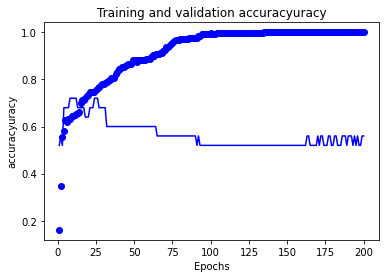

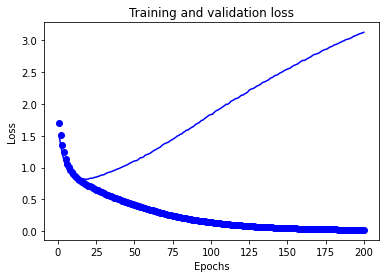

In [22]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs[0:], accuracy[0:], 'bo', label='Training accuracy')
plt.plot(epochs[0:], val_accuracy[0:], 'b', label='Validation accuracy')
plt.title('Training and validation accuracyuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracyuracy')
plt.margins(0.05)

plt.figure()

plt.plot(epochs[0:], loss[0:], 'bo', label='Training loss')
plt.plot(epochs[0:], val_loss[0:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.margins(0.05)

plt.show()

In this code we use of the matplotlib library to plot graphs of the training and validation accuracy and loss during the model training process. The accuracy and loss values for both training and validation sets are obtained from the history object, which is the result of the fit() method used for training the model. These values are then plotted against the number of epochs using the plot() function, with different colors and labels assigned to each line. The title(), xlabel(), and ylabel() functions are used to add labels to the graphs. Finally, the show() function is used to display the graphs.

We can measure that the model is overfitting on the dataset.

In [23]:
# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print('Train accuracy:', train_acc)


8/8 - 0s - loss: 0.3416 - accuracy: 0.9545 - 51ms/epoch - 6ms/step
Train accuracy: 0.9545454382896423


In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

2/2 - 0s - loss: 3.1108 - accuracy: 0.4754 - 76ms/epoch - 38ms/step
Test accuracy: 0.4754098355770111


In [25]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
pd.DataFrame(cm)

2/2 [==============================] - 0s 6ms/step
Confusion Matrix:


,0,1,2,3,4
0,24,2,2,1,0
1,4,3,4,1,0
2,4,1,1,3,0
3,2,3,1,1,0
4,0,1,0,3,0


This code computes the confusion matrix for evaluating the performance of a machine learning model. The predicted values for a test dataset are obtained using the model and compared with the true values. The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions. It helps to measure the accuracy of a model and identify areas for improvement.

## Step 4: Develop a Model with Dropout

In the preceding step, a notable distinction between training and testing accuracy was observed. To address this issue, the introduction of dropout into the model architecture is proposed. Dropout regularization can be implemented within the model to randomly remove inputs during training, effectively reducing overfitting and promoting generalization.

In [26]:
from tensorflow.keras.layers import Dropout

# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1), #adding dropout in the model
    Dense(32, activation='relu'),
    Dense(classes_n, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 3,141
Trainable params: 3,141
Non-trainable params: 0
_________________________________________________________________


In this code, the Keras library's Dropout layer is added to the neural network model. The Dropout layer helps to reduce overfitting by randomly setting a fraction of input units to 0 during training, thereby forcing the model to learn more robust features. A Dropout rate of 0.1 is set to drop 10% of the input units randomly. The rest of the code is similar to the previous example, where the model is compiled and a summary is printed.


- Fit the model on the training dataset with 100 epochs, batch size of 32, and a validation split of 0.1.

In [27]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1)

Epoch 1/200
7/7 [==============================] - 1s 50ms/step - loss: 1.4660 - accuracy: 0.4747 - val_loss: 1.3614 - val_accuracy: 0.5200
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 1.3151 - accuracy: 0.5806 - val_loss: 1.2173 - val_accuracy: 0.6400
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 1.1756 - accuracy: 0.6129 - val_loss: 1.1182 - val_accuracy: 0.6800
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 1.0822 - accuracy: 0.6267 - val_loss: 1.0431 - val_accuracy: 0.6800
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.9831 - accuracy: 0.6636 - val_loss: 0.9969 - val_accuracy: 0.6800
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.9238 - accuracy: 0.6728 - val_loss: 0.9682 - val_accuracy: 0.6800
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.9152 - accuracy: 0.6590 - val_loss: 0.9548 - val_accuracy: 0.6800
Epoch 8/200
7/7 [===

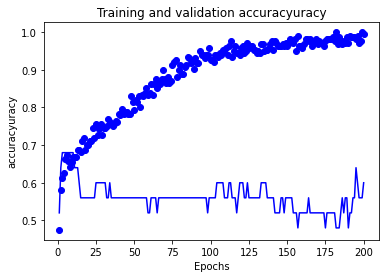

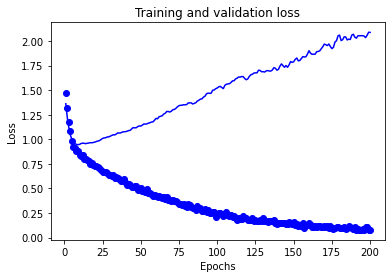

In [28]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs[0:], accuracy[0:], 'bo', label='Training accuracy')
plt.plot(epochs[0:], val_accuracy[0:], 'b', label='Validation accuracy')
plt.title('Training and validation accuracyuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracyuracy')
plt.margins(0.05)

plt.figure()

plt.plot(epochs[0:], loss[0:], 'bo', label='Training loss')
plt.plot(epochs[0:], val_loss[0:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.margins(0.05)

plt.show()

In the above line of code involves plotting the training and validation accuracy and loss metrics of a model during the training process using matplotlib.pyplot library. The accuracy and loss values are obtained from the model history. The epochs are defined and used as the x-axis of the plots. Finally, the plots are displayed using the show() function.

In [29]:
# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print('Train accuracy:', train_acc)


8/8 - 0s - loss: 0.2547 - accuracy: 0.9587 - 53ms/epoch - 7ms/step
Train accuracy: 0.9586777091026306


In [30]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


2/2 - 0s - loss: 2.7719 - accuracy: 0.4590 - 41ms/epoch - 20ms/step
Test accuracy: 0.4590163826942444


In [31]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
pd.DataFrame(cm)

2/2 [==============================] - 0s 3ms/step
Confusion Matrix:


,0,1,2,3,4
0,24,3,1,1,0
1,4,1,5,2,0
2,3,1,2,3,0
3,0,5,1,1,0
4,0,1,1,2,0


This code calculates and displays a confusion matrix, which is used to evaluate the performance of a classification model. The predictions made by the model are compared to the actual class labels and the resulting matrix shows the number of true/false positives/negatives.

## Step 5: Regularize the Model and Tune the Hyperparameters

This code performs hyperparameter tuning using grid search with cross-validation to find the best combination of hyperparameters for a Keras Sequential model. It also include L2 regularization that help to cater overfitting issue. Overall, this code is an important step in the machine learning workflow that helps to optimize the model's hyperparameters for better performance.

In [33]:
from tensorflow.keras.layers import Dropout
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the model creation function with hyperparameters
def create_model(units=64, learning_rate=0.01, dropout_rate=0.3):
    model = Sequential([
        Dense(units, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
        Dropout(dropout_rate),
        Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(dropout_rate),
        Dense(classes_n, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


#- Fit the model on the training dataset with 100 epochs, batch size of 32, and a validation split of 0.1.

# Define the hyperparameters to search
param_grid = {
    'units': [32, 64, 128],
    'learning_rate': [0.01, 0.001, 0.0001],
    'dropout_rate': [0.3, 0.4, 0.5]
}

# Create a KerasClassifier wrapper for use in scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=200, batch_size=32, verbose=0)

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print(f'Best parameters: {grid_result.best_params_}')
print(f'Best accuracy: {grid_result.best_score_}')

C:\Users\DELL\AppData\Local\Temp\ipykernel_19004\2632952920.py:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=200, batch_size=32, verbose=0)


Best parameters: {'dropout_rate': 0.4, 'learning_rate': 0.0001, 'units': 64}
Best accuracy: 0.6074829995632172


This code implements a grid search with cross-validation to find the best hyperparameters for a neural network model. The model is defined with a function that creates a sequential model with hyperparameters such as units, learning rate, and dropout rate. A KerasClassifier wrapper is created for use in scikit-learn and the GridSearchCV function is called with the hyperparameters to search. The best hyperparameters and accuracy are then printed. The model is fit on the training dataset with 200 epochs, batch size of 32, and a validation split of 0.1.

In [34]:
model = create_model(units=grid_result.best_params_['units'],
                     learning_rate=grid_result.best_params_['learning_rate'],
                     dropout_rate=grid_result.best_params_['dropout_rate'])
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1)

Epoch 1/200
7/7 [==============================] - 1s 42ms/step - loss: 1.9421 - accuracy: 0.1613 - val_loss: 1.7243 - val_accuracy: 0.2400
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 1.9288 - accuracy: 0.1521 - val_loss: 1.7015 - val_accuracy: 0.2400
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 1.9142 - accuracy: 0.1751 - val_loss: 1.6798 - val_accuracy: 0.2800
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 1.8522 - accuracy: 0.1751 - val_loss: 1.6590 - val_accuracy: 0.2800
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 1.8263 - accuracy: 0.1613 - val_loss: 1.6388 - val_accuracy: 0.3600
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 1.8009 - accuracy: 0.2074 - val_loss: 1.6195 - val_accuracy: 0.3600
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 1.8113 - accuracy: 0.1751 - val_loss: 1.6000 - val_accuracy: 0.4000
Epoch 8/200
7/7 [===

This code first creates a new model using the best hyperparameters found through a grid search using cross-validation. It then trains the model on the training data with 200 epochs, a batch size of 32, and a validation split of 0.1. The training history is stored in the "history" variable.

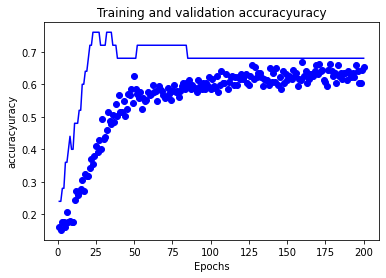

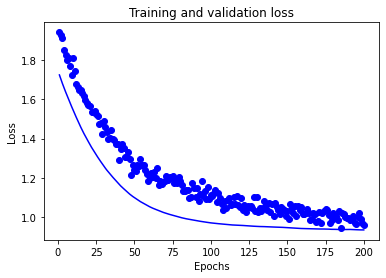

In [35]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs[0:], accuracy[0:], 'bo', label='Training accuracy')
plt.plot(epochs[0:], val_accuracy[0:], 'b', label='Validation accuracy')
plt.title('Training and validation accuracyuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracyuracy')
plt.margins(0.05)

plt.figure()

plt.plot(epochs[0:], loss[0:], 'bo', label='Training loss')
plt.plot(epochs[0:], val_loss[0:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.margins(0.05)

plt.show()

In this code plots the training and validation accuracy and loss for a machine learning model. The accuracy and loss values are obtained from the history object obtained after fitting the model to the training data. The plots help to visualize how well the model is performing and identify overfitting or underfitting.

In [36]:
# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print('Train accuracy:', train_acc)


8/8 - 0s - loss: 0.8944 - accuracy: 0.6818 - 95ms/epoch - 12ms/step
Train accuracy: 0.6818181872367859


In [37]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


2/2 - 0s - loss: 1.1192 - accuracy: 0.5246 - 40ms/epoch - 20ms/step
Test accuracy: 0.5245901346206665


In [38]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
pd.DataFrame(cm)

2/2 [==============================] - 0s 6ms/step
Confusion Matrix:


,0,1,2,3,4
0,28,0,0,1,0
1,7,1,0,4,0
2,3,1,1,4,0
3,2,2,1,2,0
4,0,0,0,4,0


This code is used to calculate the confusion matrix of the predictions made by a machine learning model. It imports the confusion_matrix function from the sklearn.metrics module. It then uses the trained model to predict the classes of the test data, and computes the confusion matrix by comparing the predicted and true class labels. The confusion matrix is then printed using pandas DataFrame to display the results in a tabular form.

## Step 5: Conclusions

In summary, the aforementioned code demonstrates a comprehensive approach to analyze and prepare the heart disease dataset for developing a classification model that can accurately classify different levels of heart disease based on various features. The code effectively handles the issue of overfitting by introducing dropout regularization and hyperparameter tuning using grid search with cross-validation. The performance of the model is evaluated using a confusion matrix, which provides meaningful insights into the model's efficacy. 

Overall, the code presents a complete machine learning workflow for developing an accurate classification model for heart diseases. It is worth noting that the 3rd model has demonstrated better performance compared to the previous models due to the addition of parameter optimization. However, to further improve the model's accuracy, more data about heart rate disease cases and additional features could be incorporated to provide more comprehensive information about the disease.

In [4]:
import sqlite3

conn = sqlite3.connect('user_database.db')
c = conn.cursor()

c.execute("SELECT * FROM users")
c.fetchone()

('Arsalan Ali', 'arskas', '123arskas', 31, 'Male', '', '', '', '')

In [6]:
c.close()

In [7]:
conn.close()